# Bladder Urothelial Carcinoma (BLCA)
[Jump to the urls to download the GCT and CLS files](#Downloads)

<p><strong>Authors:</strong> Alejandra Ramos, Marylu Villa, and Edwin Juarez</p>
<p><strong>Contact info:</strong> Email Edwin at ejuarez@cloud.ucsd.edu or post a question in <a href="http://www.genepattern.org/help" target="_blank">http://www.genepattern.org/help</a></p>

This notebook provides the steps to download all the CHOL samples (RNA-Seq) from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

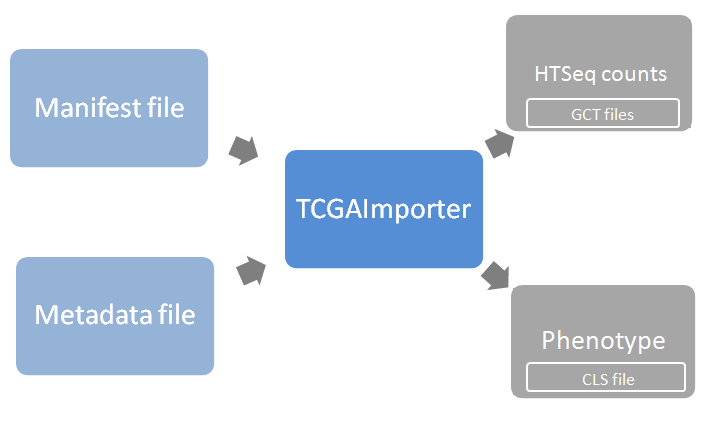

# Overview

<p><em>Bladder cancer </em>begins when cells in the urinary bladder start to grow uncontrollably. As more cancer cells develop, they can form a tumor and spread to other areas of the body.</p>

<p>The bladder is a hollow organ in the pelvis with flexible, muscular walls. Its main function is to store urine before it leaves the body. Urine is made by the kidneys and is then carried to the bladder through tubes called ureters. When you urinate, the muscles in the bladder contract, and urine is forced out of the bladder through a tube called the urethra.</p>


## BLCA Statistics

<ul>
Men are 4 times more likely than women to be diagnosed with the disease. In addition, incidence rates in white men are double those of black men.&nbsp;</li>
Bladder cancer mostly affects older people. Ninety percent (90%) of people with bladder cancer are older than 55, and the average age people are diagnosed with bladder cancer is 73.&nbsp;</li>
</ul>


<p><img alt="Image result for bladder cancer statistics" src="https://www.cancerresearchuk.org/sites/default/files/cstream-node/surv_5yr_age_bladder_0.png" /></p>

<p>https://www.cancerresearchuk.org/health-professional/cancer-statistics/statistics-by-cancer-type/bladder-cancer/survival</p>


## Dataset's Demographic Information 

<p>TCGA contains 427 BLCA&nbsp;samples (408&nbsp;primary cancer samples, 19&nbsp;normal tissue samples) from 408&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-BLCA%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link (these data were gathered on July 10th, 2018).</a></p>


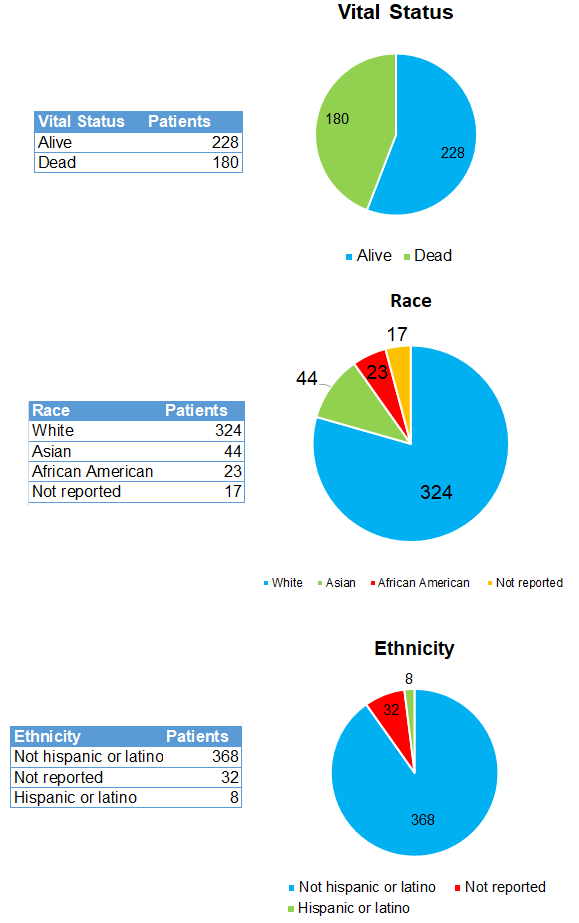

# Login to GenePattern

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [9]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter

Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

**Input files**

- Manifest file: a file containing the list of RNA-Seq samples to be downloaded. 
- Metadata file: a file containing information about the files present at the GDC Data Portal.
Instructions for downloading the Manifest and Metadata files can be found here:  https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf

<p><strong>Output files</strong></p>

<ul>
	<li><em>BLCA_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>BLCA_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

</div>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 6 minutes</p>

In [12]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/aleramos123/tmp/run9042516264714094950.tmp/BLCA_MANIFEST.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/aleramos123/tmp/run5891567815156086071.tmp/BLCA_METADATA.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "BLCA_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "True")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)


job35194 = gp.GPJob(genepattern.session.get(0), 35194)
genepattern.display(job35194)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

# Downloads

<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS

<p>[3]&nbsp;<a href="https://www.cancer.org/cancer/bladder-cancer/about/what-is-bladder-cancer.html" target="_blank">https://www.cancer.org/cancer/bladder-cancer/about/what-is-bladder-cancer.html</a></p>

<p>[4]&nbsp;<a href="https://www.cancer.net/cancer-types/bladder-cancer/statistics" target="_blank">https://www.cancer.net/cancer-types/bladder-cancer/statistics</a></p>

<p>&nbsp;</p>
